## test 3: rule 3 is applied (too aggressive)

In [ ]:
if self.minLat <= self.minLatTarget:
    if self.preBlockingDur >= self.constLat:
        self.curBlockingDur = self.preBlockingDur - self.constLat
    else:
        self.curBlockingDur = self.constLat
else:
    self.curBlockingDur = self.preBlockingDur * 2

latency model:
reqSize, lgMult=820.28, lgAdd=-1114.3, smMult=62.36, smAdd=5905.97, mu=5.1 

In order to see the effect of CoDel and Blocking, we need to compare the two runs:
First run, we **Enable** Blocking mechanism:

In [236]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1700
const lat = 200
----------------------------------
total bytes = 1228759040
total time(s) = 60.0
average throughput(MB/s) = 19.530598958333332


blocing is Enabled
number of priority inversion = 141442 number of txcs = 299990
average bluestore latency(s) = 0.0015638801145622342
average total latency(s) = 0.0017638790793942098
average osd queue size = 1.3247521650144334
average kv queue size = 3.630910297772495


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

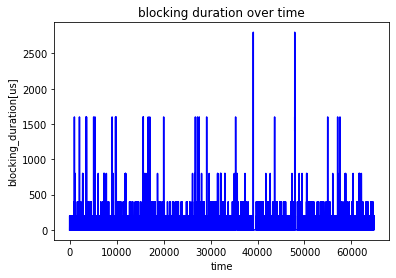

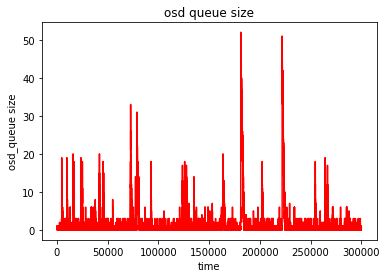

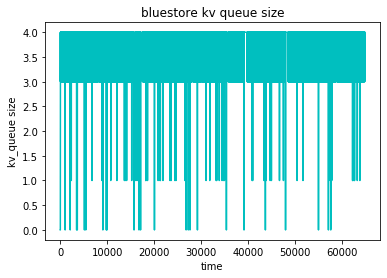

In [237]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]
print("blocing is Enabled")

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')